# Support Vector Machine에 의한 분류모형
## For iris data 

In [73]:
#!pip install scikit-learn matplotlib

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report 

In [16]:
# iris dataset laading (4개의 변수와, 1개의 target 변수)
# data(4 variables): petal_length, petal_width, sepal_length, sepal_width, 
# target varible : 품종(setosa, versicolor, verginica) 
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
x=iris.data
y=iris.target

In [28]:
# Seperate to train & test dataset 
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train, x_test

(array([[-0.4134164 , -1.46200287, -0.09951105, -0.32339776],
        [ 0.55122187, -0.50256349,  0.71770262,  0.35303182],
        [ 0.67180165,  0.21701605,  0.95119225,  0.75888956],
        [ 0.91296121, -0.02284379,  0.30909579,  0.2177459 ],
        [ 1.63643991,  1.41631528,  1.30142668,  1.70589097],
        [-0.17225683, -0.26270364,  0.19235097,  0.08245999],
        [ 2.11875905, -0.02284379,  1.59328871,  1.16474731],
        [-0.29283662, -0.02284379,  0.36746819,  0.35303182],
        [-0.89573553,  1.17645543, -1.44207638, -1.40568508],
        [ 2.23933883, -0.50256349,  1.65166111,  1.0294614 ],
        [-0.05167705, -0.74242333,  0.13397857, -0.32339776],
        [-0.77515575,  0.93659559, -1.44207638, -1.40568508],
        [-1.01631531,  1.17645543, -1.50044878, -1.27039917],
        [-0.89573553,  1.89603497, -1.15021435, -1.13511325],
        [-1.01631531, -2.42144225, -0.21625586, -0.32339776],
        [ 0.55122187, -0.74242333,  0.60095781,  0.75888956],
        

In [29]:
# SVM 모델 생성 및 학습
svm_model=SVC(kernel='linear', C=1.0, random_state=32)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=32)

In [30]:
# Prediction 
y_pred=svm_model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [31]:
# Accuracy & Performance Evaluation
accuracy=accuracy_score(y_test, y_pred)
accuracy
print(f'accurcy: {accuracy:.3f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

accurcy: 0.978
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



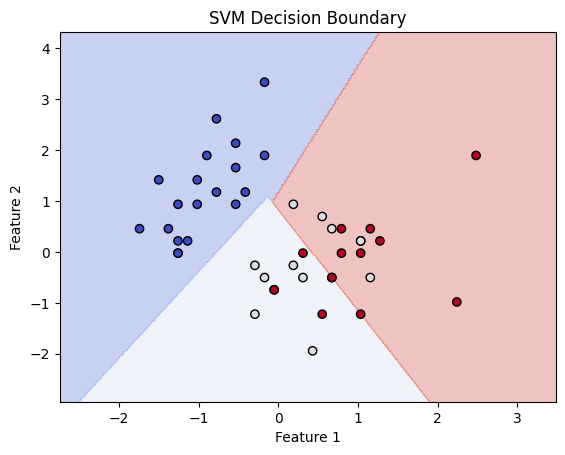

In [32]:
# Visualization (2차원 데이터만 시각화 가능)
def plot_decision_boundary(x, y, model):
    # 2D 그리드의 x, y 범위 설정
    h = .02
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 결정 경계 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


# 그래프 시각화
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Iris 데이터셋은 4차원 특성(4개 변수)를 가지므로, 두 개의 특성만 선택하여 시각화
x_train_2d = x_train[:, :2]
x_test_2d = x_test[:, :2]
model_2d = SVC(kernel='linear', C=1.0, random_state=33)
model_2d.fit(x_train_2d, y_train)
plot_decision_boundary(x_test_2d, y_test, model_2d)




## Kernel Function == sigmoid 

In [10]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = datasets.load_iris()
x = iris.data
y = iris.target

# 데이터셋 분할 (훈련용 80%, 테스트용 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
# SVM 모델 훈련 (커널 함수: 시그모이드)
svm_model = SVC(kernel='sigmoid', random_state=42)
svm_model.fit(x_train, y_train)

# 예측
y_pred = svm_model.predict(x_test)

# 모델 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 시각화 (주성분 분석을 통한 2D 플롯)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# PCA 결과를 이용한 SVM 모델 재훈련 및 예측
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=42)
svm_model_pca = SVC(kernel='sigmoid')
svm_model_pca.fit(x_train_pca, y_train_pca)


[[19  0  0]
 [ 0  9  4]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.90      0.69      0.78        13
           2       0.75      0.92      0.83        13

    accuracy                           0.89        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.90      0.89      0.89        45



SVC(kernel='sigmoid')

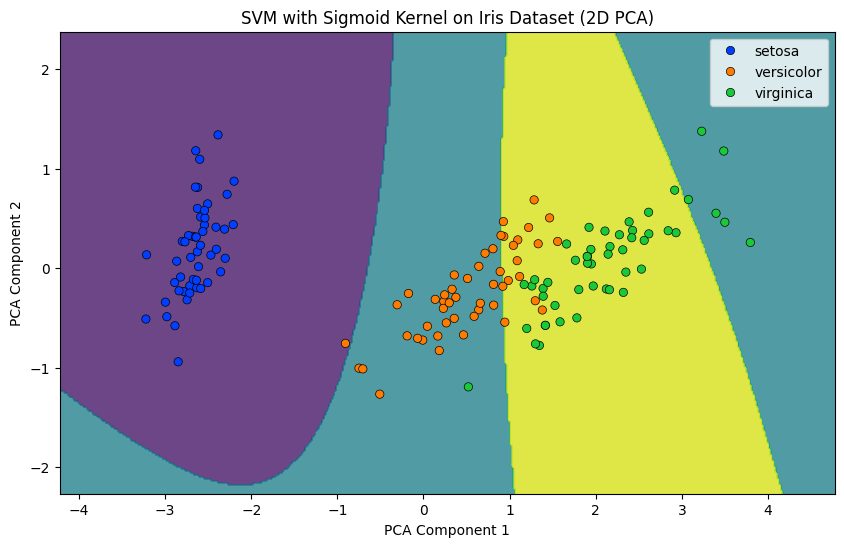

In [37]:
# 2D 시각화
h = .02  # mesh step size
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=iris.target_names[y], palette='bright', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM with Sigmoid Kernel on Iris Dataset (2D PCA)')
plt.show()